Processing Columns: 100%|██████████████████████| 95/95 [00:00<00:00, 356.01it/s]


Best predictor for Bankruptcy:  [' Net Income to Total Assets']
MSE: 0.028
Accuracy: 0.968


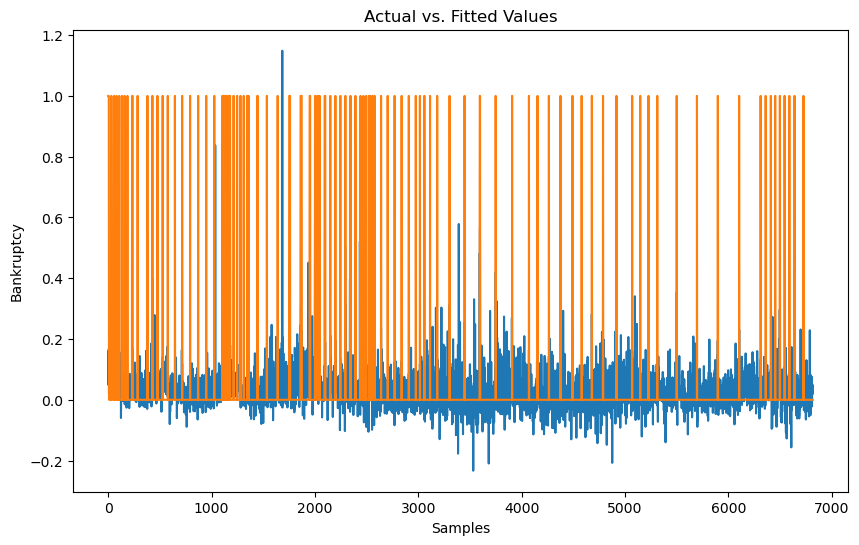

In [70]:
#To implement linear regression on the best predictor for company bankruptcy, I will be using the forward selection algorithm.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, accuracy_score


companies = pd.read_csv('data.csv')

target = 'Bankrupt?'
predictors = [col for col in companies.columns if col != target]

#forward selection
def forward_selection (companies, target, predictors):
    features = []
    best_features = []
    while True: 
        features_left = list(set(predictors) - set(features))
        new_val = pd.Series(index = features_left)
        for new_col in tqdm(features_left, desc="Processing Columns"):
            model = sm.OLS(companies[target], sm.add_constant(companies[features + [new_col]])).fit()
            new_val[new_col] = model.pvalues[new_col]
        min_p_value = new_val.min()
        if min_p_value < 0.05:
            best_feature = new_val.idxmin()
            features.append(best_feature)
            best_features.append(best_feature)
        else:
            break
        return best_features

best_predictors = forward_selection(companies, target, predictors)
print("Best predictor for Bankruptcy: ", best_predictors)

final_model = sm.OLS(companies[target], sm.add_constant(companies[best_predictors])).fit()

#find accuracy 
prediction = final_model.predict(sm.add_constant(companies[best_predictors]))
mse = mean_squared_error(companies[target], prediction)
print(f"MSE: {mse:.3f}")

threshold = 0.5
predicted_bankruptcy = (predictions >= threshold).astype(int)
accuracy = accuracy_score(companies[target], predicted_bankruptcy)
print(f"Accuracy: {accuracy:.3f}")

#plot
plt.figure(figsize=(10, 6))
plt.plot(final_model.fittedvalues, label = "Fitted Values")
plt.plot(companies[target], label="Actual Values")
plt.legend
plt.xlabel('Samples')
plt.ylabel('Bankruptcy')
plt.title("Actual vs. Fitted Values")
plt.show()


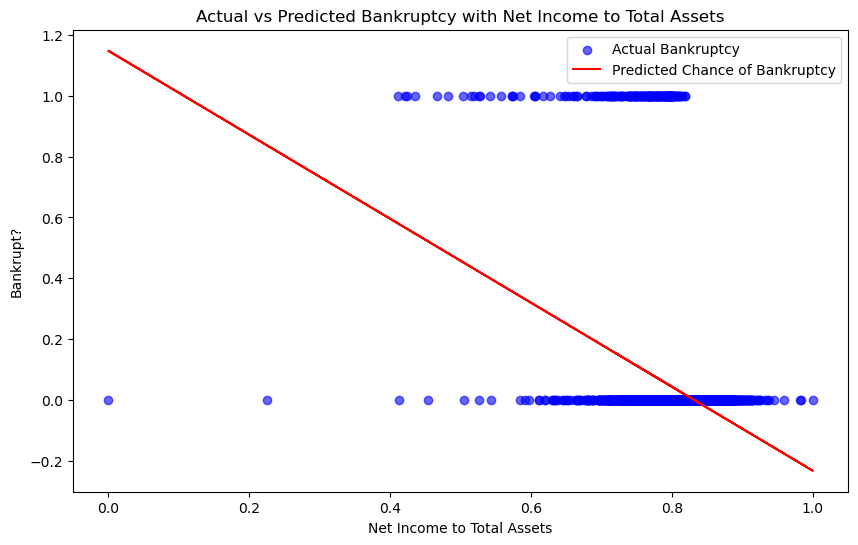

In [79]:
#Now, we're going to take the best predictor for bankruptcy and create a linear regression model to illustrate.
companies.columns = companies.columns.str.strip()

target = 'Bankrupt?'
feature = 'Net Income to Total Assets'

x = companies[[feature]]
y = companies[target]

x = sm.add_constant(x)
final_model = sm.OLS(y, x).fit()

predictions = final_model.predict(x)
   
threshold = 0.5
predicted_bankruptcy = (predictions >= threshold).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(companies[feature], y, color='blue', label='Actual Bankruptcy', alpha=0.6)
plt.plot(companies[feature], predictions, color='red', label='Predicted Chance of Bankruptcy')
plt.xlabel('Net Income to Total Assets')
plt.ylabel('Bankrupt?')
plt.title('Actual vs Predicted Bankruptcy with Net Income to Total Assets')
plt.legend()
plt.show()